In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, train_label), (input_test, test_label) = imdb.load_data(num_words = max_features)

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

시퀀스 패딩 (samples x time)


In [ ]:
from keras.layers import Dense, Embedding, LSTM
from keras import models

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, train_label, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 61s 372ms/step - loss: 0.4942 - acc: 0.7666 - val_loss: 0.3658 - val_acc: 0.8502
Epoch 2/10
157/157 [==============================] - 58s 370ms/step - loss: 0.2975 - acc: 0.8827 - val_loss: 0.3452 - val_acc: 0.8652
Epoch 3/10
157/157 [==============================] - 58s 369ms/step - loss: 0.2366 - acc: 0.9110 - val_loss: 0.4642 - val_acc: 0.8308
Epoch 4/10
157/157 [==============================] - 58s 368ms/step - loss: 0.2016 - acc: 0.9255 - val_loss: 0.2911 - val_acc: 0.8860
Epoch 5/10
157/157 [==============================] - 58s 370ms/step - loss: 0.1756 - acc: 0.9367 - val_loss: 0.3180 - val_acc: 0.8856
Epoch 6/10
157/157 [==============================] - 59s 375ms/step - loss: 0.1610 - acc: 0.9436 - val_loss: 0.4005 - val_acc: 0.8794
Epoch 7/10
157/157 [==============================] - 59s 373ms/step - loss: 0.1481 - acc: 0.9488 - val_loss: 0.3104 - val_acc: 0.8884
Epoch 8/10
157/157 [==============================] - 5

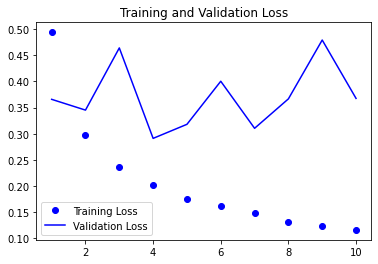

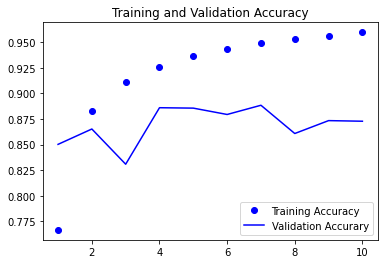

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epoch = range(1, len(loss) + 1)

plt.plot(epoch, loss, 'bo', label = 'Training Loss')
plt.plot(epoch, val_loss, 'b', label = 'Validation Loss')

plt.title('Training and Validation Loss')
plt.legend()

plt.figure()

plt.plot(epoch, acc, 'bo', label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'b', label = 'Validation Accurary')

plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
''' LSTM '''
# 그래디언트 소실 문제로부터 SimpltRNN보다 영향을 덜 받는다.
# 이전 SimpltRNN보다 획기적인 정확도를 보이지는 않는다.
# 임베딩 차원이나 LSTM출력 차원 같은 하이퍼파라미터를 전혀 튜닝하지 않았기 때문
# 규제가 없기 때문
